In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm

In [2]:
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
abalone_df = pd.read_csv('./uci_repos/abalone/abalone.data', names=column_names)
abalone_df

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
for gender in ['M', 'F', 'I']:
    abalone_df[gender] = (abalone_df["sex"] == gender)
    abalone_df[gender] = abalone_df[gender].astype(int)
del abalone_df["sex"]
abalone_df

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,1,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1,0,0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1,0,0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0,1,0


In [4]:
minority_group = [1, 2, 3, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
new_abalone_df = abalone_df[~abalone_df['rings'].isin(minority_group)]
new_abalone_df

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,1,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1,0,0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1,0,0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0,1,0


In [5]:
class_names = abalone_df['rings'].unique()
class_names, ' number of labels', len(class_names)

(array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
        17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24]),
 ' number of labels',
 28)

In [6]:
new_abalone_df.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,M,F,I
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.00000,4024.000000
mean,0.522863,0.406754,0.138777,0.818721,0.357861,0.179051,0.234223,9.628728,0.364066,0.30840,0.327535
std,0.118574,0.097934,0.041370,0.485442,0.222316,0.108976,0.134852,2.648677,0.481227,0.46189,0.469372
min,0.130000,0.095000,0.000000,0.010500,0.005000,0.000500,0.003500,4.000000,0.000000,0.00000,0.000000
25%,0.450000,0.345000,0.113750,0.437750,0.182000,0.091875,0.127500,8.000000,0.000000,0.00000,0.000000
50%,0.540000,0.420000,0.140000,0.785000,0.332500,0.168500,0.226500,9.000000,0.000000,0.00000,0.000000
75%,0.615000,0.480000,0.165000,1.140750,0.500125,0.250000,0.320125,11.000000,1.000000,1.00000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,0.897000,17.000000,1.000000,1.00000,1.000000


In [7]:
print('total number of samples ', len(new_abalone_df))

total number of samples  4024


In [8]:
labels = new_abalone_df['rings'].to_numpy()
del new_abalone_df['rings']
data = new_abalone_df.values.astype(np.float)

In [9]:
data.shape, labels.shape

((4024, 10), (4024,))

In [10]:
len(np.unique(labels))

14

# Random Undersampling

Class=15, n=103 (2.560%)
Class=7, n=391 (9.717%)
Class=9, n=689 (17.122%)
Class=10, n=634 (15.755%)
Class=8, n=568 (14.115%)
Class=16, n=67 (1.665%)
Class=14, n=126 (3.131%)
Class=11, n=487 (12.102%)
Class=12, n=267 (6.635%)
Class=13, n=203 (5.045%)
Class=5, n=115 (2.858%)
Class=4, n=57 (1.417%)
Class=6, n=259 (6.436%)
Class=17, n=58 (1.441%)


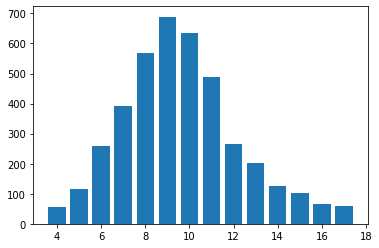

4024 4024


In [19]:
from collections import Counter
counter = Counter(labels)
for k,v in counter.items():
    per = v / len(labels) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

print(len(data), len(labels))

Class=4, n=57 (7.143%)
Class=5, n=57 (7.143%)
Class=6, n=57 (7.143%)
Class=7, n=57 (7.143%)
Class=8, n=57 (7.143%)
Class=9, n=57 (7.143%)
Class=10, n=57 (7.143%)
Class=11, n=57 (7.143%)
Class=12, n=57 (7.143%)
Class=13, n=57 (7.143%)
Class=14, n=57 (7.143%)
Class=15, n=57 (7.143%)
Class=16, n=57 (7.143%)
Class=17, n=57 (7.143%)


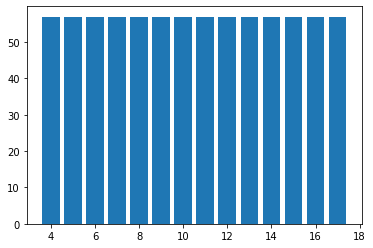

798 798


In [22]:
from imblearn.under_sampling import RandomUnderSampler
# sampling_strategy={15:103, 7:300, 9:300, 10:300, 8:300, 16:67, 14:126, 11:300, 12:267, 13:203, 5:115, 4:57, 6:259, 
#                    17:58}
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(data, labels)

counter2 = Counter(y_undersampled)
for k,v in counter2.items():
    per = v / len(y_undersampled) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter2.keys(), counter2.values())
plt.show()
print(len(X_undersampled), len(y_undersampled))

In [37]:
def post_process_results(b_list, filename='default.csv'):
    total_df = pd.DataFrame(b_list[0]).transpose()
    print('number of runs: {}'.format(len(b_list)))
    for r_dict in b_list[1:]:
        temp = pd.DataFrame(r_dict).transpose()
        total_df = total_df.add(temp)
        
    average_pd = total_df/10.0
    average_pd.to_csv(filename, sep=',')
    
    return average_pd

In [52]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

undersampling_list =[]
for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
    X_train, y_train = rus.fit_resample(X_train, y_train)
    y_train = LabelEncoder().fit_transform(y_train)
    y_test = LabelEncoder().fit_transform(y_test)
    
    baseline_model = build_model(num_classes=y_dim)
    batch_size=32
    epochs=2
    y_train_oh = np.array(tf.keras.utils.to_categorical(y_train, num_classes=y_dim, dtype='float32'))
    test_y = np.array(tf.keras.utils.to_categorical(y_test, num_classes=y_dim, dtype='float32'))
    
    history_baseline = baseline_model.fit(X_train, y_train_oh, batch_size=batch_size, 
                        epochs=epochs, validation_data=(X_test, test_y))
    
    score_baseline = baseline_model.evaluate(X_test, test_y, verbose=0)
    print('baseline test loss: ',score_baseline[0])
    print('baseline test accuracy: ', score_baseline[1] )

    y_pred_baseline_oh = baseline_model.predict(X_test)
    y_pred_baseline = y_pred_baseline_oh.argmax(axis=-1)
    undersampling_list.append(classification_report(y_test, y_pred_baseline, output_dict=True))

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_183 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_122 (Bat (None, 32)                128       
_________________________________________________________________
dense_184 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_123 (Bat (None, 64)                256       
_________________________________________________________________
flatten_61 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_185 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


658/658 [==============================] - 3s 4ms/sample - loss: 3.3250 - acc: 0.0957 - val_loss: 2.6356 - val_acc: 0.1081
Epoch 2/2
658/658 [==============================] - 0s 248us/sample - loss: 3.0953 - acc: 0.1170 - val_loss: 2.5969 - val_acc: 0.1205
baseline test loss:  2.596937682761909
baseline test accuracy:  0.12049689


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_124 (Bat (None, 32)                128       
_________________________________________________________________
dense_187 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_125 (Bat (None, 64)                256       
_________________________________________________________________
flatten_62 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_188 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


658/658 [==============================] - 3s 4ms/sample - loss: 3.4581 - acc: 0.1079 - val_loss: 2.6139 - val_acc: 0.1019
Epoch 2/2
658/658 [==============================] - 0s 237us/sample - loss: 3.0075 - acc: 0.1429 - val_loss: 2.6253 - val_acc: 0.0870
baseline test loss:  2.6253212762915568
baseline test accuracy:  0.08695652


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_126 (Bat (None, 32)                128       
_________________________________________________________________
dense_190 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_127 (Bat (None, 64)                256       
_________________________________________________________________
flatten_63 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_191 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


658/658 [==============================] - 3s 5ms/sample - loss: 3.5132 - acc: 0.0973 - val_loss: 2.6519 - val_acc: 0.0261
Epoch 2/2
658/658 [==============================] - 0s 232us/sample - loss: 2.9116 - acc: 0.1353 - val_loss: 2.6497 - val_acc: 0.0298
baseline test loss:  2.649664780812234
baseline test accuracy:  0.029813664


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_128 (Bat (None, 32)                128       
_________________________________________________________________
dense_193 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_129 (Bat (None, 64)                256       
_________________________________________________________________
flatten_64 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_194 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


658/658 [==============================] - 3s 4ms/sample - loss: 3.8004 - acc: 0.0805 - val_loss: 2.6557 - val_acc: 0.1155
Epoch 2/2
658/658 [==============================] - 0s 225us/sample - loss: 3.0887 - acc: 0.1277 - val_loss: 2.6598 - val_acc: 0.0435
baseline test loss:  2.6597564999361216
baseline test accuracy:  0.04347826


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_195 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_130 (Bat (None, 32)                128       
_________________________________________________________________
dense_196 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_131 (Bat (None, 64)                256       
_________________________________________________________________
flatten_65 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_197 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


658/658 [==============================] - 3s 4ms/sample - loss: 3.5987 - acc: 0.0973 - val_loss: 2.6078 - val_acc: 0.1043
Epoch 2/2
658/658 [==============================] - 0s 227us/sample - loss: 2.9828 - acc: 0.1459 - val_loss: 2.6056 - val_acc: 0.1155
baseline test loss:  2.6056364728797297
baseline test accuracy:  0.11552795


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_198 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_132 (Bat (None, 32)                128       
_________________________________________________________________
dense_199 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_133 (Bat (None, 64)                256       
_________________________________________________________________
flatten_66 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_200 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


658/658 [==============================] - 3s 4ms/sample - loss: 3.5207 - acc: 0.0942 - val_loss: 2.6137 - val_acc: 0.0932
Epoch 2/2
658/658 [==============================] - 0s 227us/sample - loss: 3.0643 - acc: 0.1246 - val_loss: 2.5918 - val_acc: 0.1379
baseline test loss:  2.5918059701504914
baseline test accuracy:  0.1378882


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_134 (Bat (None, 32)                128       
_________________________________________________________________
dense_202 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_135 (Bat (None, 64)                256       
_________________________________________________________________
flatten_67 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_203 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


658/658 [==============================] - 3s 4ms/sample - loss: 3.5617 - acc: 0.1018 - val_loss: 2.5888 - val_acc: 0.0795
Epoch 2/2
658/658 [==============================] - 0s 236us/sample - loss: 2.9936 - acc: 0.1353 - val_loss: 2.5713 - val_acc: 0.1118
baseline test loss:  2.5712906870042316
baseline test accuracy:  0.111801244


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_204 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_136 (Bat (None, 32)                128       
_________________________________________________________________
dense_205 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_137 (Bat (None, 64)                256       
_________________________________________________________________
flatten_68 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_68 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_206 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


658/658 [==============================] - 3s 4ms/sample - loss: 3.4735 - acc: 0.1064 - val_loss: 2.6326 - val_acc: 0.0286
Epoch 2/2
658/658 [==============================] - 0s 272us/sample - loss: 2.9913 - acc: 0.1261 - val_loss: 2.6253 - val_acc: 0.0484
baseline test loss:  2.625338914231484
baseline test accuracy:  0.048447207


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_207 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_138 (Bat (None, 32)                128       
_________________________________________________________________
dense_208 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_139 (Bat (None, 64)                256       
_________________________________________________________________
flatten_69 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_209 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


658/658 [==============================] - 4s 6ms/sample - loss: 3.6203 - acc: 0.0897 - val_loss: 2.6198 - val_acc: 0.0596
Epoch 2/2
658/658 [==============================] - 0s 408us/sample - loss: 3.1922 - acc: 0.1322 - val_loss: 2.6045 - val_acc: 0.0932
baseline test loss:  2.604487948091874
baseline test accuracy:  0.0931677


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_210 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_140 (Bat (None, 32)                128       
_________________________________________________________________
dense_211 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_141 (Bat (None, 64)                256       
_________________________________________________________________
flatten_70 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_212 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


658/658 [==============================] - 4s 6ms/sample - loss: 3.5257 - acc: 0.0927 - val_loss: 2.6306 - val_acc: 0.1429
Epoch 2/2
658/658 [==============================] - 0s 276us/sample - loss: 2.9629 - acc: 0.1626 - val_loss: 2.6145 - val_acc: 0.1019
baseline test loss:  2.614496207977674
baseline test accuracy:  0.101863354


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

In [53]:
post_process_results(undersampling_list, 'results_csv/abalone_undersamling.csv')

number of runs: 10


,precision,recall,f1-score,support
0,0.200000,0.040000,0.066667,10.000000
1,0.051240,0.258824,0.079394,17.000000
2,0.067568,0.097619,0.038241,42.000000
3,0.104128,0.220253,0.135495,79.000000
4,0.070383,0.066372,0.052404,113.000000
5,0.074074,0.018705,0.026125,139.000000
6,0.042295,0.056589,0.046512,129.000000
7,0.080715,0.124742,0.062320,97.000000
8,0.024124,0.030000,0.020900,50.000000
9,0.007506,0.025532,0.010352,47.000000


# Random Oversampling

Class=15, n=689 (7.143%)
Class=7, n=689 (7.143%)
Class=9, n=689 (7.143%)
Class=10, n=689 (7.143%)
Class=8, n=689 (7.143%)
Class=16, n=689 (7.143%)
Class=14, n=689 (7.143%)
Class=11, n=689 (7.143%)
Class=12, n=689 (7.143%)
Class=13, n=689 (7.143%)
Class=5, n=689 (7.143%)
Class=4, n=689 (7.143%)
Class=6, n=689 (7.143%)
Class=17, n=689 (7.143%)


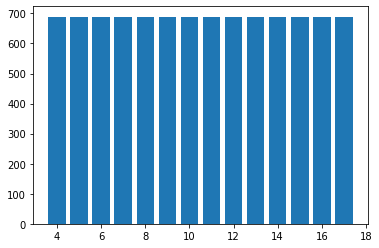

9646 9646


In [54]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(data, labels)

counter3 = Counter(y_oversampled)
for k,v in counter3.items():
    per = v / len(y_oversampled) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter3.keys(), counter3.values())
plt.show()
print(len(X_oversampled), len(y_oversampled))

In [55]:
oversampling_list =[]    
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
    ros = RandomOverSampler(random_state=42)
    X_train, y_train = ros.fit_resample(X_train, y_train)
    y_train = LabelEncoder().fit_transform(y_train)
    y_test = LabelEncoder().fit_transform(y_test)

    baseline_model = build_model(num_classes=y_dim)
    batch_size=32
    epochs=2
    y_train_oh = np.array(tf.keras.utils.to_categorical(y_train, num_classes=y_dim, dtype='float32'))
    test_y = np.array(tf.keras.utils.to_categorical(y_test, num_classes=y_dim, dtype='float32'))
    
    history_baseline = baseline_model.fit(X_train, y_train_oh, batch_size=batch_size, 
                        epochs=epochs, validation_data=(X_test, test_y))
    
    score_baseline = baseline_model.evaluate(X_test, test_y, verbose=0)
    print('oversampling test loss: ',score_baseline[0])
    print('oversampling test accuracy: ', score_baseline[1] )

    y_pred_baseline_oh = baseline_model.predict(X_test)
    y_pred_baseline = y_pred_baseline_oh.argmax(axis=-1)
    oversampling_list.append(classification_report(y_test, y_pred_baseline, output_dict=True))

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_213 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_142 (Bat (None, 32)                128       
_________________________________________________________________
dense_214 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_143 (Bat (None, 64)                256       
_________________________________________________________________
flatten_71 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_71 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_215 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7700/7700 [==============================] - 5s 623us/sample - loss: 2.7635 - acc: 0.1600 - val_loss: 2.5446 - val_acc: 0.0981
Epoch 2/2
7700/7700 [==============================] - 1s 184us/sample - loss: 2.3487 - acc: 0.2003 - val_loss: 2.3481 - val_acc: 0.1453
oversampling test loss:  2.34806366262969
oversampling test accuracy:  0.14534162
Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_216 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_144 (Bat (None, 32)                128       
_________________________________________________________________
dense_217 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_145 (Bat (None, 64)                256       
_____________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7700/7700 [==============================] - 4s 541us/sample - loss: 2.6602 - acc: 0.1790 - val_loss: 2.4860 - val_acc: 0.1627
Epoch 2/2
7700/7700 [==============================] - 1s 140us/sample - loss: 2.2735 - acc: 0.2149 - val_loss: 2.2487 - val_acc: 0.2149
oversampling test loss:  2.2487279551369803
oversampling test accuracy:  0.21490683
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_219 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_146 (Bat (None, 32)                128       
_________________________________________________________________
dense_220 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_147 (Bat (None, 64)                256       
___________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7700/7700 [==============================] - 4s 553us/sample - loss: 2.6539 - acc: 0.1801 - val_loss: 2.4976 - val_acc: 0.1006
Epoch 2/2
7700/7700 [==============================] - 1s 172us/sample - loss: 2.2545 - acc: 0.2162 - val_loss: 2.2071 - val_acc: 0.2037
oversampling test loss:  2.2071231015720723
oversampling test accuracy:  0.20372671
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_222 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_148 (Bat (None, 32)                128       
_________________________________________________________________
dense_223 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_149 (Bat (None, 64)                256       
___________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7700/7700 [==============================] - 4s 546us/sample - loss: 2.7067 - acc: 0.1670 - val_loss: 2.3943 - val_acc: 0.1814
Epoch 2/2
7700/7700 [==============================] - 1s 140us/sample - loss: 2.2854 - acc: 0.2065 - val_loss: 2.1586 - val_acc: 0.2149
oversampling test loss:  2.158552103753416
oversampling test accuracy:  0.21490683


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_225 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_150 (Bat (None, 32)                128       
_________________________________________________________________
dense_226 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_151 (Bat (None, 64)                256       
_________________________________________________________________
flatten_75 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_75 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_227 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7700/7700 [==============================] - 4s 516us/sample - loss: 2.7385 - acc: 0.1629 - val_loss: 2.4373 - val_acc: 0.1416
Epoch 2/2
7700/7700 [==============================] - 1s 140us/sample - loss: 2.3197 - acc: 0.2039 - val_loss: 2.2779 - val_acc: 0.1739
oversampling test loss:  2.277864314902643
oversampling test accuracy:  0.17391305


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_228 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_152 (Bat (None, 32)                128       
_________________________________________________________________
dense_229 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_153 (Bat (None, 64)                256       
_________________________________________________________________
flatten_76 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_76 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_230 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7700/7700 [==============================] - 4s 507us/sample - loss: 2.7200 - acc: 0.1597 - val_loss: 2.4013 - val_acc: 0.1975
Epoch 2/2
7700/7700 [==============================] - 1s 136us/sample - loss: 2.3046 - acc: 0.2014 - val_loss: 2.2007 - val_acc: 0.2497
oversampling test loss:  2.2006522066104486
oversampling test accuracy:  0.24968944


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_231 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_154 (Bat (None, 32)                128       
_________________________________________________________________
dense_232 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_155 (Bat (None, 64)                256       
_________________________________________________________________
flatten_77 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_77 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_233 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7700/7700 [==============================] - 4s 571us/sample - loss: 2.7787 - acc: 0.1556 - val_loss: 2.4221 - val_acc: 0.2161
Epoch 2/2
7700/7700 [==============================] - 1s 138us/sample - loss: 2.3151 - acc: 0.2047 - val_loss: 2.1067 - val_acc: 0.2472
oversampling test loss:  2.1066816483965574
oversampling test accuracy:  0.24720497
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_234 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_156 (Bat (None, 32)                128       
_________________________________________________________________
dense_235 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_157 (Bat (None, 64)                256       
___________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7700/7700 [==============================] - 4s 550us/sample - loss: 2.7015 - acc: 0.1668 - val_loss: 2.5159 - val_acc: 0.1242
Epoch 2/2
7700/7700 [==============================] - 1s 152us/sample - loss: 2.3040 - acc: 0.2052 - val_loss: 2.1987 - val_acc: 0.2062
oversampling test loss:  2.198650740984804
oversampling test accuracy:  0.20621118
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_237 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_158 (Bat (None, 32)                128       
_________________________________________________________________
dense_238 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_159 (Bat (None, 64)                256       
____________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7700/7700 [==============================] - 4s 532us/sample - loss: 2.6599 - acc: 0.1762 - val_loss: 2.3437 - val_acc: 0.2398
Epoch 2/2
7700/7700 [==============================] - 1s 174us/sample - loss: 2.2376 - acc: 0.2265 - val_loss: 2.1438 - val_acc: 0.2385
oversampling test loss:  2.1437644144022685
oversampling test accuracy:  0.23850931
Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_240 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_160 (Bat (None, 32)                128       
_________________________________________________________________
dense_241 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_161 (Bat (None, 64)                256       
___________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7700/7700 [==============================] - 5s 585us/sample - loss: 2.7419 - acc: 0.1666 - val_loss: 2.4456 - val_acc: 0.1379
Epoch 2/2
7700/7700 [==============================] - 1s 147us/sample - loss: 2.2979 - acc: 0.2153 - val_loss: 2.1864 - val_acc: 0.2112
oversampling test loss:  2.186409848373129
oversampling test accuracy:  0.21118012


In [56]:
post_process_results(oversampling_list, 'results_csv/abalone_oversamling.csv')

number of runs: 10


,precision,recall,f1-score,support
0,0.802273,0.240000,0.354212,10.000000
1,0.399126,0.576471,0.457444,17.000000
2,0.273975,0.411905,0.306248,42.000000
3,0.330070,0.358228,0.307782,79.000000
4,0.330238,0.257522,0.265883,113.000000
5,0.315546,0.153237,0.152357,139.000000
6,0.252360,0.156589,0.137113,129.000000
7,0.238735,0.273196,0.227582,97.000000
8,0.064174,0.054000,0.044063,50.000000
9,0.049201,0.021277,0.028927,47.000000


 # VAE Model

In [24]:
import tensorflow.compat.v1  as tf
tf.disable_v2_behavior()
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import os
import numpy as np

mb_size = 32
z_dim = 3
X_dim = 10
y_dim = len(np.unique(labels))
h_dim = 3
lr = 1e-3

    
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random.normal(shape=size, stddev=xavier_stddev)

X = tf.keras.Input(shape=(X_dim,))
c = tf.keras.Input(shape=(y_dim,))
z = tf.keras.Input(shape=(z_dim,))

Q_W1 = tf.Variable(xavier_init([X_dim + y_dim, h_dim]))
Q_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

Q_W2_mu = tf.Variable(xavier_init([h_dim, z_dim]))
Q_b2_mu = tf.Variable(tf.zeros(shape=[z_dim]))

Q_W2_sigma = tf.Variable(xavier_init([h_dim, z_dim]))
Q_b2_sigma = tf.Variable(tf.zeros(shape=[z_dim]))


def Q(X, c):
    inputs = tf.concat(axis=1, values=[X, c])
    h = tf.nn.relu(tf.matmul(inputs, Q_W1) + Q_b1)
    z_mu = tf.matmul(h, Q_W2_mu) + Q_b2_mu
    z_logvar = tf.matmul(h, Q_W2_sigma) + Q_b2_sigma
    return z_mu, z_logvar


def sample_z(mu, log_var):
    eps = tf.random.normal(shape=tf.shape(mu))
    return mu + tf.exp(log_var / 2) * eps

P_W1 = tf.Variable(xavier_init([z_dim + y_dim, h_dim]))
P_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

P_W2 = tf.Variable(xavier_init([h_dim, X_dim]))
P_b2 = tf.Variable(tf.zeros(shape=[X_dim]))


def P(z, c):
    inputs = tf.concat(axis=1, values=[z, c])
    h = tf.nn.relu(tf.matmul(inputs, P_W1) + P_b1)
    logits = tf.matmul(h, P_W2) + P_b2
    prob = tf.nn.sigmoid(logits)
    return prob, logits

z_mu, z_logvar = Q(X, c)
z_sample = sample_z(z_mu, z_logvar)
_, logits = P(z_sample, c)

X_samples, _ = P(z, c)

recon_loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=X), 1)
kl_loss = 0.5 * tf.reduce_sum(tf.exp(z_logvar) + z_mu**2 - 1. - z_logvar, 1)
vae_loss = tf.reduce_mean(recon_loss + kl_loss)

Instructions for updating:
non-resource variables are not supported in the long term


In [25]:
def generate_sample():
    samples = []
    gen_labels =[]
    for r in range(10):
        for index in range(y_dim):
            gen_labels = gen_labels + [index]*mb_size
            y = np.zeros([mb_size, y_dim])
            y[range(mb_size), index] = 1
            samples.extend(sess.run(X_samples,
                                   feed_dict={z: np.random.randn(mb_size, z_dim), c: y}))

    gen_samples = np.array(samples).round(decimals=2)
    gen_labels = np.array(gen_labels)
    print(gen_samples.shape)
    print(gen_labels.shape)
    
    return gen_samples, gen_labels

# MLP model

In [26]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input, Flatten
from tensorflow.keras.models import Sequential


def build_model(input_shape=(10,), num_classes=y_dim):
    """

    :param input_shape: shape of input_data
    :param num_classes: number of classes
    :return: keras.model.sequential compiled with categorical cross-entropy loss
    """
    model = Sequential([
        Input(shape=input_shape),
        Dense(32, activation="relu"),
        BatchNormalization(),
        Dense(64, activation="relu"),
        BatchNormalization(),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ])

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()
    return model

# Baseline Experiment

In [48]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

baseline_list =[]
print('training labels', np.unique(labels))
for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
    y_train = LabelEncoder().fit_transform(y_train)
    y_test = LabelEncoder().fit_transform(y_test)

    baseline_model = build_model(num_classes=y_dim)
    batch_size=32
    epochs=2
    y_train_oh = np.array(tf.keras.utils.to_categorical(y_train, num_classes=y_dim, dtype='float32'))
    test_y = np.array(tf.keras.utils.to_categorical(y_test, num_classes=y_dim, dtype='float32'))
    
    history_baseline = baseline_model.fit(X_train, y_train_oh, batch_size=batch_size, 
                        epochs=epochs, validation_data=(X_test, test_y))
    
    score_baseline = baseline_model.evaluate(X_test, test_y, verbose=0)
    print('baseline test loss: ',score_baseline[0])
    print('baseline test accuracy: ', score_baseline[1] )

    y_pred_baseline_oh = baseline_model.predict(X_test)
    y_pred_baseline = y_pred_baseline_oh.argmax(axis=-1)
    baseline_list.append(classification_report(y_test, y_pred_baseline, output_dict=True))

training labels [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_82 (Batc (None, 32)                128       
_________________________________________________________________
dense_124 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_83 (Batc (None, 64)                256       
_________________________________________________________________
flatten_41 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 64)                0         
___________________________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


3219/3219 [==============================] - 2s 533us/sample - loss: 3.0049 - acc: 0.1497 - val_loss: 2.4658 - val_acc: 0.1578
Epoch 2/2
3219/3219 [==============================] - 0s 133us/sample - loss: 2.5511 - acc: 0.1951 - val_loss: 2.3169 - val_acc: 0.1789
baseline test loss:  2.316907789692375
baseline test accuracy:  0.17888199


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_84 (Batc (None, 32)                128       
_________________________________________________________________
dense_127 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_85 (Batc (None, 64)                256       
_________________________________________________________________
flatten_42 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_128 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


3219/3219 [==============================] - 2s 540us/sample - loss: 3.1160 - acc: 0.1382 - val_loss: 2.4792 - val_acc: 0.1814
Epoch 2/2
3219/3219 [==============================] - 0s 117us/sample - loss: 2.6153 - acc: 0.1889 - val_loss: 2.3366 - val_acc: 0.2012
baseline test loss:  2.3366002414537514
baseline test accuracy:  0.20124224


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_86 (Batc (None, 32)                128       
_________________________________________________________________
dense_130 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_87 (Batc (None, 64)                256       
_________________________________________________________________
flatten_43 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_131 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


3219/3219 [==============================] - 2s 667us/sample - loss: 3.0763 - acc: 0.1271 - val_loss: 2.4568 - val_acc: 0.1627
Epoch 2/2
3219/3219 [==============================] - 0s 136us/sample - loss: 2.6095 - acc: 0.1917 - val_loss: 2.3160 - val_acc: 0.1851
baseline test loss:  2.315988011685958
baseline test accuracy:  0.18509316


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_88 (Batc (None, 32)                128       
_________________________________________________________________
dense_133 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_89 (Batc (None, 64)                256       
_________________________________________________________________
flatten_44 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_134 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


3219/3219 [==============================] - 2s 557us/sample - loss: 3.0962 - acc: 0.1382 - val_loss: 2.4222 - val_acc: 0.1689
Epoch 2/2
3219/3219 [==============================] - 0s 119us/sample - loss: 2.5863 - acc: 0.1855 - val_loss: 2.2660 - val_acc: 0.1888
baseline test loss:  2.2660062582596487
baseline test accuracy:  0.18881987


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_90 (Batc (None, 32)                128       
_________________________________________________________________
dense_136 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_91 (Batc (None, 64)                256       
_________________________________________________________________
flatten_45 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_137 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


3219/3219 [==============================] - 2s 566us/sample - loss: 3.0280 - acc: 0.1382 - val_loss: 2.4231 - val_acc: 0.2050
Epoch 2/2
3219/3219 [==============================] - 0s 118us/sample - loss: 2.5808 - acc: 0.1839 - val_loss: 2.2943 - val_acc: 0.2149
baseline test loss:  2.2942953918291176
baseline test accuracy:  0.21490683


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_92 (Batc (None, 32)                128       
_________________________________________________________________
dense_139 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_93 (Batc (None, 64)                256       
_________________________________________________________________
flatten_46 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_140 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


3219/3219 [==============================] - 2s 604us/sample - loss: 3.0728 - acc: 0.1240 - val_loss: 2.4213 - val_acc: 0.1925
Epoch 2/2
3219/3219 [==============================] - 0s 117us/sample - loss: 2.5423 - acc: 0.2038 - val_loss: 2.2871 - val_acc: 0.2050
baseline test loss:  2.287103379587209
baseline test accuracy:  0.20496894


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_94 (Batc (None, 32)                128       
_________________________________________________________________
dense_142 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_95 (Batc (None, 64)                256       
_________________________________________________________________
flatten_47 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_143 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


3219/3219 [==============================] - 2s 603us/sample - loss: 3.0129 - acc: 0.1491 - val_loss: 2.4251 - val_acc: 0.2360
Epoch 2/2
3219/3219 [==============================] - 0s 128us/sample - loss: 2.5553 - acc: 0.2103 - val_loss: 2.2580 - val_acc: 0.2335
baseline test loss:  2.257975409786153
baseline test accuracy:  0.23354037


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_96 (Batc (None, 32)                128       
_________________________________________________________________
dense_145 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_97 (Batc (None, 64)                256       
_________________________________________________________________
flatten_48 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_146 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


3219/3219 [==============================] - 2s 640us/sample - loss: 3.0780 - acc: 0.1258 - val_loss: 2.4980 - val_acc: 0.1727
Epoch 2/2
3219/3219 [==============================] - 0s 123us/sample - loss: 2.5808 - acc: 0.1951 - val_loss: 2.3477 - val_acc: 0.2311
baseline test loss:  2.347688601476065
baseline test accuracy:  0.2310559


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_98 (Batc (None, 32)                128       
_________________________________________________________________
dense_148 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_99 (Batc (None, 64)                256       
_________________________________________________________________
flatten_49 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_149 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


3219/3219 [==============================] - 2s 602us/sample - loss: 2.8574 - acc: 0.1572 - val_loss: 2.4330 - val_acc: 0.1826
Epoch 2/2
3219/3219 [==============================] - 0s 123us/sample - loss: 2.4797 - acc: 0.2122 - val_loss: 2.2829 - val_acc: 0.2000
baseline test loss:  2.2829305094961794
baseline test accuracy:  0.2


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_100 (Bat (None, 32)                128       
_________________________________________________________________
dense_151 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_101 (Bat (None, 64)                256       
_________________________________________________________________
flatten_50 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_152 (Dense)            (None, 14)              

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


3219/3219 [==============================] - 2s 608us/sample - loss: 3.0178 - acc: 0.1233 - val_loss: 2.5182 - val_acc: 0.1863
Epoch 2/2
3219/3219 [==============================] - 0s 126us/sample - loss: 2.5407 - acc: 0.1886 - val_loss: 2.3953 - val_acc: 0.2087
baseline test loss:  2.3953067255316314
baseline test accuracy:  0.20869565


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

In [49]:
post_process_results(baseline_list, 'results_csv/abalone_baseline_cnn.csv')

number of runs: 10


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,10.00000
1,0.009091,0.005882,0.007143,17.00000
2,0.086906,0.135714,0.093345,42.00000
3,0.124238,0.196203,0.147268,79.00000
4,0.157852,0.207080,0.161289,113.00000
5,0.159334,0.340288,0.195591,139.00000
6,0.146589,0.347287,0.179426,129.00000
7,0.249998,0.287629,0.179371,97.00000
8,0.025000,0.002000,0.003704,50.00000
9,0.000000,0.000000,0.000000,47.00000


# Augmentation Experiment

In [50]:
augment_list =[]
for i in range(10):
    
    X_train, X_test, y_train, y_test1 = train_test_split(data, labels, test_size=0.2, random_state=40)
    y_train = LabelEncoder().fit_transform(y_train)
    y_test = LabelEncoder().fit_transform(y_test1)
    y_train_oh = np.array(tf.keras.utils.to_categorical(y_train, num_classes=y_dim, dtype='float32'))
    test_y = np.array(tf.keras.utils.to_categorical(y_test, num_classes=y_dim, dtype='float32'))
    
    
    solver = tf.compat.v1.train.AdamOptimizer().minimize(vae_loss)
    sess = tf.compat.v1.Session ()
    sess.run(
    tf.compat.v1.global_variables_initializer())

    i = 0
    for it in tqdm(range(50000)):
        ind = np.random.choice(X_train.shape[0], mb_size)
        X_mb = np.array(X_train[ind])
        y_mb = np.array(y_train_oh[ind])

        _, loss = sess.run([solver, vae_loss], feed_dict={X: X_mb, c: y_mb})

    
    gen_samples, gen_labels = generate_sample()
    x = np.concatenate([X_train, gen_samples])
    y = np.concatenate([y_train, gen_labels])
    x = np.array(x)
    y_oh = np.array(tf.keras.utils.to_categorical(y, num_classes=y_dim, dtype='float32'))
    
    aug_model = build_model(num_classes=y_dim)
    batch_size=32
    epochs=2
    hist = aug_model.fit(x, y_oh, batch_size=batch_size, epochs=epochs, 
                            validation_data=(X_test, test_y))
    
    y_pred_aug_oh = aug_model.predict(X_test)
    y_pred_aug = y_pred_aug_oh.argmax(axis=-1)
    augment_list.append(classification_report(y_test, y_pred_aug, output_dict=True) )

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:43<00:00, 1159.39it/s]


(4480, 10)
(4480,)
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_102 (Bat (None, 32)                128       
_________________________________________________________________
dense_154 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_103 (Bat (None, 64)                256       
_________________________________________________________________
flatten_51 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_155 (Dense)            (None

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7699/7699 [==============================] - 3s 331us/sample - loss: 2.4002 - acc: 0.2565 - val_loss: 2.2571 - val_acc: 0.2224
Epoch 2/2
7699/7699 [==============================] - 1s 117us/sample - loss: 1.8232 - acc: 0.3990 - val_loss: 2.0258 - val_acc: 0.2472


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

(4480, 10)
(4480,)
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_104 (Bat (None, 32)                128       
_________________________________________________________________
dense_157 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_105 (Bat (None, 64)                256       
_________________________________________________________________
flatten_52 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_158 (Dense)            (None

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7699/7699 [==============================] - 3s 331us/sample - loss: 2.4597 - acc: 0.2457 - val_loss: 2.2035 - val_acc: 0.2484
Epoch 2/2
7699/7699 [==============================] - 1s 117us/sample - loss: 1.9346 - acc: 0.3562 - val_loss: 2.0220 - val_acc: 0.2683


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

(4480, 10)
(4480,)
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_106 (Bat (None, 32)                128       
_________________________________________________________________
dense_160 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_107 (Bat (None, 64)                256       
_________________________________________________________________
flatten_53 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_161 (Dense)            (None

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7699/7699 [==============================] - 3s 343us/sample - loss: 2.7093 - acc: 0.1669 - val_loss: 2.3044 - val_acc: 0.2075
Epoch 2/2
7699/7699 [==============================] - 1s 117us/sample - loss: 2.3187 - acc: 0.2079 - val_loss: 2.0539 - val_acc: 0.2335


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

(4480, 10)
(4480,)
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_108 (Bat (None, 32)                128       
_________________________________________________________________
dense_163 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_109 (Bat (None, 64)                256       
_________________________________________________________________
flatten_54 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_164 (Dense)            (None

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7699/7699 [==============================] - 3s 415us/sample - loss: 2.8107 - acc: 0.1473 - val_loss: 2.3882 - val_acc: 0.2149
Epoch 2/2
7699/7699 [==============================] - 1s 143us/sample - loss: 2.3464 - acc: 0.2022 - val_loss: 2.0623 - val_acc: 0.2534


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

(4480, 10)
(4480,)
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_110 (Bat (None, 32)                128       
_________________________________________________________________
dense_166 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_111 (Bat (None, 64)                256       
_________________________________________________________________
flatten_55 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_167 (Dense)            (None

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7699/7699 [==============================] - 3s 370us/sample - loss: 2.4947 - acc: 0.2526 - val_loss: 2.1886 - val_acc: 0.2373
Epoch 2/2
7699/7699 [==============================] - 1s 120us/sample - loss: 1.8928 - acc: 0.3865 - val_loss: 2.0114 - val_acc: 0.2658


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

(4480, 10)
(4480,)
Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_112 (Bat (None, 32)                128       
_________________________________________________________________
dense_169 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_113 (Bat (None, 64)                256       
_________________________________________________________________
flatten_56 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_170 (Dense)            (None

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7699/7699 [==============================] - 3s 384us/sample - loss: 2.4585 - acc: 0.2431 - val_loss: 2.3332 - val_acc: 0.1863
Epoch 2/2
7699/7699 [==============================] - 1s 123us/sample - loss: 1.9028 - acc: 0.3728 - val_loss: 2.0917 - val_acc: 0.2696


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

(4480, 10)
(4480,)
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_114 (Bat (None, 32)                128       
_________________________________________________________________
dense_172 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_115 (Bat (None, 64)                256       
_________________________________________________________________
flatten_57 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_173 (Dense)            (None

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7699/7699 [==============================] - 3s 423us/sample - loss: 2.4993 - acc: 0.2348 - val_loss: 2.3618 - val_acc: 0.2050
Epoch 2/2
7699/7699 [==============================] - 1s 127us/sample - loss: 1.9226 - acc: 0.3402 - val_loss: 2.1105 - val_acc: 0.2472


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

(4480, 10)
(4480,)
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_116 (Bat (None, 32)                128       
_________________________________________________________________
dense_175 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_117 (Bat (None, 64)                256       
_________________________________________________________________
flatten_58 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_176 (Dense)            (None

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7699/7699 [==============================] - 3s 422us/sample - loss: 2.4898 - acc: 0.2207 - val_loss: 2.2862 - val_acc: 0.2236
Epoch 2/2
7699/7699 [==============================] - 1s 127us/sample - loss: 1.8824 - acc: 0.3559 - val_loss: 2.0339 - val_acc: 0.2534


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

(4480, 10)
(4480,)
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_118 (Bat (None, 32)                128       
_________________________________________________________________
dense_178 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_119 (Bat (None, 64)                256       
_________________________________________________________________
flatten_59 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_179 (Dense)            (None

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7699/7699 [==============================] - 3s 431us/sample - loss: 2.5380 - acc: 0.2122 - val_loss: 2.3338 - val_acc: 0.2149
Epoch 2/2
7699/7699 [==============================] - 1s 128us/sample - loss: 1.9757 - acc: 0.3276 - val_loss: 2.0946 - val_acc: 0.2460


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

(4480, 10)
(4480,)
Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 32)                352       
_________________________________________________________________
batch_normalization_120 (Bat (None, 32)                128       
_________________________________________________________________
dense_181 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_121 (Bat (None, 64)                256       
_________________________________________________________________
flatten_60 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_182 (Dense)            (None

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


7699/7699 [==============================] - 3s 447us/sample - loss: 2.4701 - acc: 0.2472 - val_loss: 2.3152 - val_acc: 0.2149
Epoch 2/2
7699/7699 [==============================] - 1s 129us/sample - loss: 1.8859 - acc: 0.3693 - val_loss: 2.0735 - val_acc: 0.2484


/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

In [51]:
post_process_results(augment_list, 'results_csv/abalone_VAE.csv')

number of runs: 10


,precision,recall,f1-score,support
0,0.252500,0.240000,0.221660,10.000000
1,0.227261,0.184615,0.189231,26.000000
2,0.210620,0.200000,0.180877,48.000000
3,0.310045,0.431183,0.354255,93.000000
4,0.270808,0.308696,0.246217,115.000000
5,0.263491,0.332117,0.277389,137.000000
6,0.233232,0.381102,0.254864,127.000000
7,0.230007,0.162500,0.170777,88.000000
8,0.244614,0.061224,0.075262,49.000000
9,0.021429,0.006000,0.009375,50.000000
